In [3]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [38]:
# permet d'afficher les graphiques dans un notebook
%matplotlib inline
# importer les données dans un data frame pandas
cars = pd.read_csv("cars.csv",sep=';')
carsdr = cars.dropna()
carsdr

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US
...,...,...,...,...,...,...,...,...,...
401,Ford Mustang GL,27.0,4,140.0,86.0,2790.0,15.6,82,US
402,Volkswagen Pickup,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
403,Dodge Rampage,32.0,4,135.0,84.0,2295.0,11.6,82,US
404,Ford Ranger,28.0,4,120.0,79.0,2625.0,18.6,82,US


In [5]:
# suppression des colonnes non numériques
carsdata = cars.drop(columns = ['Car','Origin'])

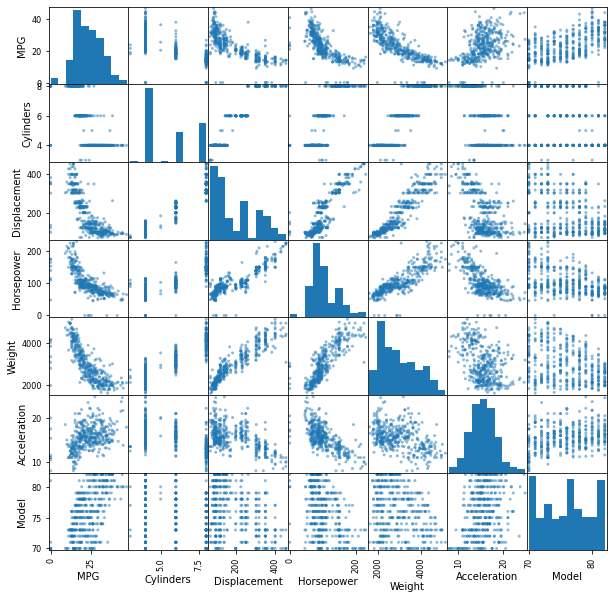

In [6]:
pd.plotting.scatter_matrix(carsdata, figsize = (10,10))
plt.show()

In [39]:
scaler = StandardScaler()
scaler.fit(carsdata)
carsdata=scaler.transform(carsdata) 
pca = PCA()
pca.fit(carsdata)


PCA()

In [8]:

cov_mat = numpy.cov(carsdata , rowvar = False)
eigen_values , eigen_vectors = numpy.linalg.eigh(cov_mat)
print(cov_mat)
print("______"* 4)
print(eigen_values)
print("______"*4)
print(eigen_vectors)
print("______"*4)




[[ 1.00246914 -0.73737886 -0.76616416 -0.72846445 -0.78945441  0.42553824
   0.58768113]
 [-0.73737886  1.00246914  0.95413713  0.82550026  0.8974309  -0.52374152
  -0.3616525 ]
 [-0.76616416  0.95413713  1.00246914  0.87591573  0.93477706 -0.55936137
  -0.38265671]
 [-0.72846445  0.82550026  0.87591573  1.00246914  0.8428867  -0.68373085
  -0.42096602]
 [-0.78945441  0.8974309   0.93477706  0.8428867   1.00246914 -0.43114775
  -0.31616758]
 [ 0.42553824 -0.52374152 -0.55936137 -0.68373085 -0.43114775  1.00246914
   0.30273812]
 [ 0.58768113 -0.3616525  -0.38265671 -0.42096602 -0.31616758  0.30273812
   1.00246914]]
________________________
[0.03505579 0.06816715 0.15087801 0.22555628 0.70989741 0.86902628
 4.95870301]
________________________
[[ 0.06301765  0.20313165  0.17051932 -0.80222366  0.2573687   0.25578774
  -0.38789259]
 [ 0.43593121 -0.45679023 -0.47901023 -0.36862843 -0.14622033  0.19960674
   0.41802597]
 [-0.81578912  0.10492609 -0.15710977 -0.25629924 -0.11331375  0.186

In [9]:
#sort the eigenvalues in descending order
sorted_index = numpy.argsort(eigen_values)[::-1] 
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]
print(sorted_eigenvalue)
print("______"*4)
print(sorted_eigenvectors)
print("______"*4)

[4.95870301 0.86902628 0.70989741 0.22555628 0.15087801 0.06816715
 0.03505579]
________________________
[[-0.38789259  0.25578774  0.2573687  -0.80222366  0.17051932  0.20313165
   0.06301765]
 [ 0.41802597  0.19960674 -0.14622033 -0.36862843 -0.47901023 -0.45679023
   0.43593121]
 [ 0.43089034  0.18600902 -0.11331375 -0.25629924 -0.15710977  0.10492609
  -0.81578912]
 [ 0.41830023  0.09744181  0.17101044 -0.04543377  0.79225152 -0.39450845
   0.03036165]
 [ 0.41414014  0.22757577 -0.29556594  0.02547762  0.16635918  0.72645001
   0.36508065]
 [-0.2935897  -0.04331319 -0.88482968 -0.1583793   0.24653209 -0.19723421
  -0.06513125]
 [-0.23758177  0.89273107 -0.00368815  0.35645988 -0.02594163 -0.12962585
  -0.04508958]]
________________________


In [10]:
n_components = 6
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
#Transform the data 
X_reduced = numpy.dot(eigenvector_subset.transpose(),carsdata.transpose()).transpose()
X_reduced

array([[ 2.5872737 , -0.81260816,  0.55456313, -0.71433923, -0.62561699,
        -0.03891375],
       [ 3.4094655 , -0.6848804 ,  0.65592616, -0.53802288, -0.07274714,
        -0.21213902],
       [ 2.91078876, -0.74775229,  0.966959  , -0.70917726, -0.35201275,
        -0.21081001],
       ...,
       [-1.53174679,  1.27335765,  1.85458014,  0.41050971, -0.21940693,
         0.21917943],
       [-2.03265166,  1.09325391, -0.60045656,  0.44918776,  0.30516559,
        -0.05364999],
       [-2.18180888,  1.20332893, -0.78069602,  0.11907268,  0.51547658,
         0.01395052]])

In [11]:
principal_df = pd.DataFrame(X_reduced)
principal_df

,0,1,2,3,4,5
0,2.587274,-0.812608,0.554563,-0.714339,-0.625617,-0.038914
1,3.409466,-0.684880,0.655926,-0.538023,-0.072747,-0.212139
2,2.910789,-0.747752,0.966959,-0.709177,-0.352013,-0.210810
3,2.839347,-0.849843,0.605783,-0.540392,-0.284205,-0.346261
4,2.846659,-0.819480,1.064803,-0.534544,-0.585573,-0.107172
...,...,...,...,...,...,...
401,-1.436492,1.205922,0.267241,0.662682,0.160188,0.226952
402,-4.017360,1.249154,-1.922132,-1.348159,0.567188,-0.273900
403,-1.531747,1.273358,1.854580,0.410510,-0.219407,0.219179
404,-2.032652,1.093254,-0.600457,0.449188,0.305166,-0.053650


In [12]:

cars_pca = pca.transform(carsdata)
cars_pca


array([[ 2.5872737 ,  0.81260816, -0.55456313, ...,  0.62561699,
        -0.03891375, -0.13147469],
       [ 3.4094655 ,  0.6848804 , -0.65592616, ...,  0.07274714,
        -0.21213902,  0.10634629],
       [ 2.91078876,  0.74775229, -0.966959  , ...,  0.35201275,
        -0.21081001, -0.05476269],
       ...,
       [-1.53174679, -1.27335765, -1.85458014, ...,  0.21940693,
         0.21917943,  0.13557449],
       [-2.03265166, -1.09325391,  0.60045656, ..., -0.30516559,
        -0.05364999,  0.073013  ],
       [-2.18180888, -1.20332893,  0.78069602, ..., -0.51547658,
         0.01395052,  0.0180599 ]])

In [13]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)


[4.95870301 0.86902628 0.70989741 0.22555628 0.15087801 0.06816715
 0.03505579]
[0.70664135 0.12384083 0.10116413 0.03214296 0.02150091 0.00971418
 0.00499563]


In [40]:
eig = pd.DataFrame({"Dimension" : ["Dim" + str(x + 1) for x in range(7)],"Variance expliquée" : pca.explained_variance_,"% variance expliquée" : numpy.round(pca.explained_variance_ratio_ * 100),
"% cum. var. expliquée" : numpy.round(numpy.cumsum(pca.explained_variance_ratio_) * 100)})
print(eig)

  Dimension  Variance expliquée  % variance expliquée  % cum. var. expliquée
0      Dim1            4.958703                  71.0                   71.0
1      Dim2            0.869026                  12.0                   83.0
2      Dim3            0.709897                  10.0                   93.0
3      Dim4            0.225556                   3.0                   96.0
4      Dim5            0.150878                   2.0                   99.0
5      Dim6            0.068167                   1.0                  100.0
6      Dim7            0.035056                   0.0                  100.0


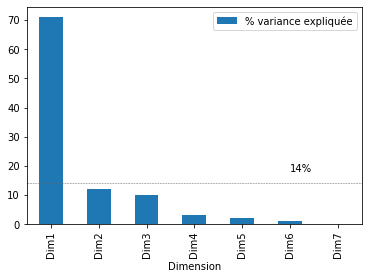

In [15]:
eig.plot.bar(x = "Dimension", y = "% variance expliquée") # permet un diagramme enbarres
plt.text(5, 18, "14%") # ajout de texte
plt.axhline(y = 14, linewidth = .5, color = "dimgray", linestyle = "--") # ligne 14= 100 / 7 
plt.show()

In [16]:
print(carsdr.get("Origin"))

0          US
1          US
2          US
3          US
4          US
        ...  
401        US
402    Europe
403        US
404        US
405        US
Name: Origin, Length: 406, dtype: object


In [24]:
# Transformation en DataFrame pandas
cars_pca_df = pd.DataFrame({
 "Dim1" : cars_pca[:,0],
 "Dim2" : cars_pca[:,1],
 "Origin" : carsdr["Origin"]
})



In [25]:
cars_pca_df.head()

,Dim1,Dim2,Origin
0,2.587274,0.812608,US
1,3.409466,0.684880,US
2,2.910789,0.747752,US
3,2.839347,0.849843,US
4,2.846659,0.819480,US


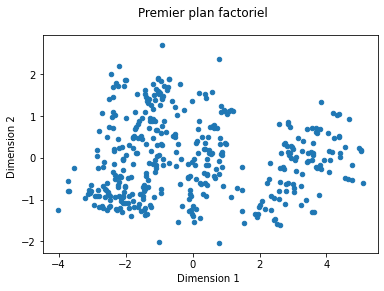

In [19]:

cars_pca_df.plot.scatter("Dim1", "Dim2") # nuage de points
plt.xlabel("Dimension 1 ") # modification du nom de l'axe X
plt.ylabel("Dimension 2 ") # idem pour axe Y
plt.suptitle("Premier plan factoriel ") # titre général
plt.show()

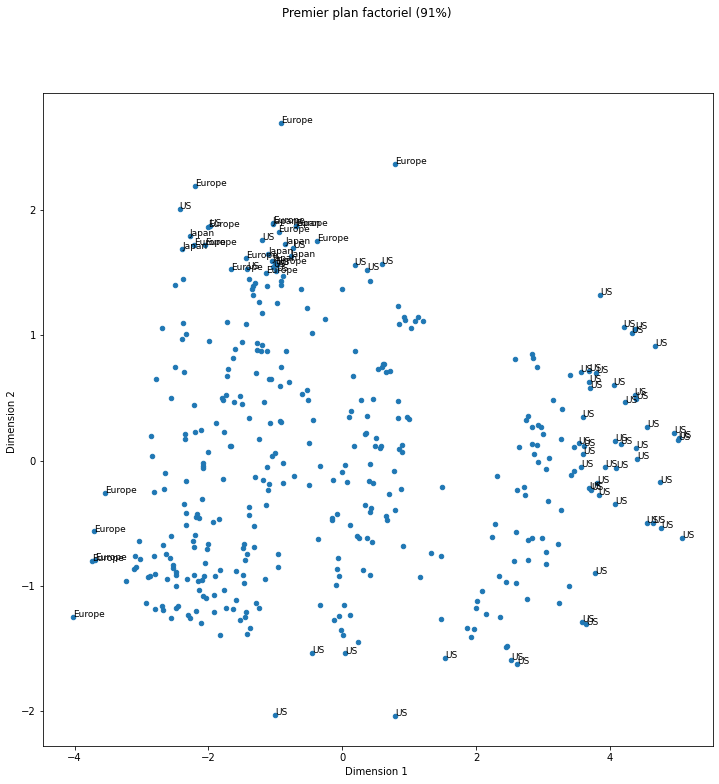

In [27]:
# utilisation de subplots nécessaire car annotation du graphique
fig, ax = plt.subplots()
cars_pca_df.plot.scatter("Dim1", "Dim2", ax = ax, figsize = (12,12)) # l'option ax permet de placer les points et le texte sur le même graphique
# boucle sur chaque pays
for k in cars_pca_df.iterrows():
 # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
 if (abs(k[1]['Dim1']) > 3.5) | (abs(k[1]['Dim2']) > 1.5):ax.annotate(k[1]["Origin"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 9)
plt.xlabel("Dimension 1 ") 
plt.ylabel("Dimension 2 ")
plt.suptitle("Premier plan factoriel (91%)")
plt.show()

In [28]:
palette = plt.get_cmap("Dark2")
couleurs = dict(zip(cars_pca_df["Origin"].drop_duplicates(), palette(range(7))))
couleurs

{'US': array([0.10588235, 0.61960784, 0.46666667, 1.        ]),
 'Europe': array([0.85098039, 0.37254902, 0.00784314, 1.        ]),
 'Japan': array([0.45882353, 0.43921569, 0.70196078, 1.        ])}

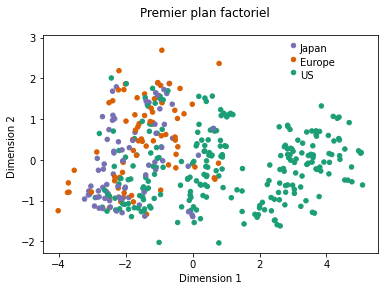

In [29]:
position = dict(zip(couleurs.keys(), range(7)))
position
# Affichage des points avec une liste de couleurs
cars_pca_df.plot.scatter(x = "Dim1", y = "Dim2", c = [couleurs[p] for p in cars_pca_df["Origin"]])
# boucle pour afficher la légende
for cont, coul in couleurs.items():
 plt.scatter(3, position[cont] / 3 + 2.15, c = [coul], s = 20)
 plt.text(3.2, position[cont] / 3 + 2, cont)
plt.xlabel("Dimension 1") 
plt.ylabel("Dimension 2 ")
plt.suptitle("Premier plan factoriel")
plt.show()

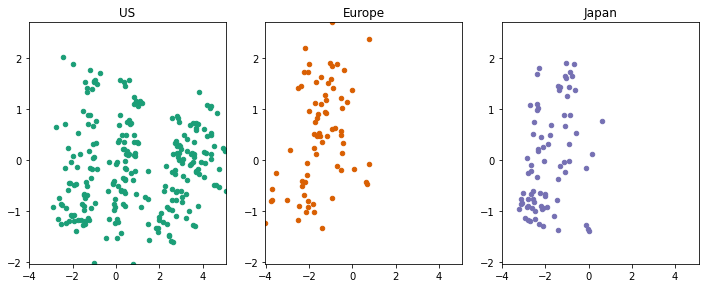

In [30]:
fig = plt.figure(figsize = (12,12))
fig.subplots_adjust(hspace = 0.7, wspace = 0.2)
for cont, coul in couleurs.items():
 ax = fig.add_subplot(2, 3, position[cont] + 1)
 temp = cars_pca_df.query('Origin == "' + cont + '"')
 temp.plot.scatter(x = "Dim1", y = "Dim2", c = [coul], ax = ax)
 ax.set_title(cont)
 ax.set_xlim(cars_pca_df.Dim1.quantile([0, 1])) # permet d'avoir min et max
 ax.set_ylim(cars_pca_df.Dim2.quantile([0, 1])) # idem
 ax.set_xlabel("")
 ax.set_ylabel("")
plt.show()

In [32]:
n = carsdata.shape[0] # nb individus
p = carsdata.shape[1] # nb variables
carsdata1 = cars.drop(columns = ['Car','Origin'])
eigval = (n-1) / n * pca.explained_variance_ # valeurs propres
sqrt_eigval = numpy.sqrt(eigval) # racine carrée des valeurs propres
corvar = numpy.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'id': carsdata1.columns, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1]})
coordvar

,id,COR_1,COR_2
0,MPG,-0.862700,-0.238156
1,Cylinders,0.929719,-0.185847
2,Displacement,0.958330,-0.173187
3,Horsepower,0.930329,-0.090725
4,Weight,0.921077,-0.211888
5,Acceleration,-0.652964,0.040327
6,Model,-0.528399,-0.831192


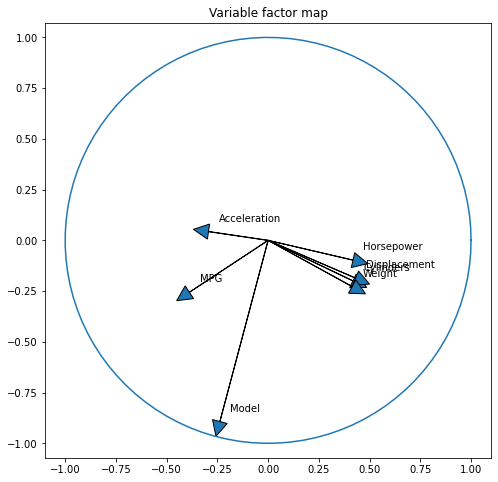

In [34]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca.components_.shape[1]):
 plt.arrow(0,
 0, # Start the arrow at the origin
 pca.components_[0, i], #0 for PC1
 pca.components_[1, i], #1 for PC2
 head_width=0.075,
 head_length=0.075)
 plt.text(pca.components_[0, i] + 0.05,
 pca.components_[1, i] + 0.05,
 carsdata1.columns.values[i])
an = numpy.linspace(0, 2 * numpy.pi, 100)
plt.plot(numpy.cos(an), numpy.sin(an)) # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

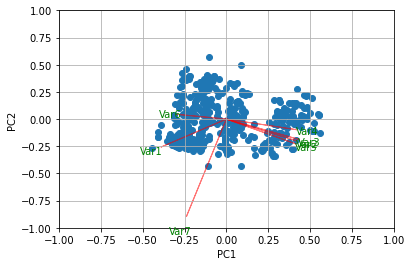

In [36]:
def myplot(score,coeff,labels=None):
 xs = score[:,0]
 ys = score[:,1]
 n = coeff.shape[0]
 scalex = 1.0/(xs.max() - xs.min())
 scaley = 1.0/(ys.max() - ys.min())
 plt.scatter(xs * scalex,ys * scaley)
 for i in range(n):
     plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
     if labels is None:
         plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
     else:
         plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', 
ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
#Call the function. Use only the 2 PCs.
myplot(cars_pca[:,0:2],numpy.transpose(pca.components_[0:2, :]))

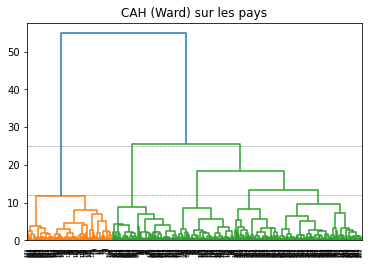

In [37]:
from sklearn.cluster import AgglomerativeClustering
hac = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hac.fit(carsdata)
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
 # Create linkage matrix and then plot the dendrogram
 # create the counts of samples under each node
 counts = numpy.zeros(model.children_.shape[0])
 n_samples = len(model.labels_)
 for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
       if child_idx < n_samples:
          current_count += 1 # leaf node
       else:
          current_count += counts[child_idx - n_samples]
    counts[i] = current_count
 linkage_matrix = numpy.column_stack([model.children_, model.distances_,
 counts]).astype(float)
 # Plot the corresponding dendrogram
 dendrogram(linkage_matrix, **kwargs)
plt.title("CAH (Ward) sur les pays")
# plot the top three levels of the dendrogram
plot_dendrogram(hac)
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--")
plt.axhline(y = 12, linewidth = .5, color = "dimgray", linestyle = "--")
plt.show()